# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Load data for 1.
airbnb = pd.read_csv('airbnb_hw.csv')
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [36]:
# Price before cleaning
print(airbnb.shape, '\n')
print(airbnb["Price"].dtype, '\n')
print(airbnb.columns, '\n')
airbnb["Price"].isnull().sum()

(30478, 13) 

object 

Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object') 



0

In [37]:
# Cleaning the Price variable

# Remove commas and extra spaces
airbnb["Price"] = airbnb["Price"].str.replace(",", "", regex=True)
airbnb["Price"] = airbnb["Price"].str.replace(" ", "", regex=True)

# Convert to numeric
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors = "coerce")

# Price after cleaning
print(airbnb["Price"].describe())
airbnb["Price"].isnull().sum()

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64


0

To clean the Price column, I removed commas from values that are over 999 and also removed any extra spaces. Before cleaning, the Price column dtype was object so I converted it to numeric. There were no missing values before cleaning, and no missing values after cleaning.

2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

In [58]:
# Load data for 2.
police = pd.read_csv('mn_police_use_of_force.csv')
police.head()

,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [73]:
# Cleaning subject_injury column
var = "subject_injury"

# Replace missing values with np.nan
police[var] = police[var].replace(' ', np.nan)
print(police[var].unique(), "\n")
print(police[var].value_counts(dropna=False), '\n')

[nan 'No' 'Yes'] 

subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64 



In [75]:
# Count missing values
missing_count = police["subject_injury"].isna().sum()
total_count = len(police)
missing_percentage = (missing_count / total_count) * 100

print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 76.19%


In [71]:
# Cross-tabulate subject_injury with force_type
pd.crosstab(police["subject_injury"], police["force_type"], dropna = False)

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172
NaN,2,7051,1421,0,27,74,87,0,170,31,985


As we can see, 76% of the values in subject_injury are missing which is a concern since this is a very large portion of the data. When I cross-tabulated the subject_injury column with the force_type column, we see the most missing values occurs with "Bodily Force" (7051 cases) and "Chemical Irritant" (1421 cases). This suggests that when bodily force is used or a chemical irritant is involved, the injury status is often not recorded. We also see that there are very few missing values for "Firearm," suggesting that injury status is almost always recorded when firearms are involved.

3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.

In [76]:
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)

In [82]:
df.head()
print(df.columns, '\n')

Index(['InternalStudyID', 'REQ_REC#', 'Defendant_Sex', 'Defendant_Race',
       'Defendant_BirthYear', 'Defendant_Age', 'Defendant_AgeGroup',
       'Defendant_AgeatCurrentArrest', 'Defendant_AttorneyTypeAtCaseClosure',
       'Defendant_IndigencyStatus',
       ...
       'NewFelonySexualAssaultArrest_OffDate',
       'NewFelonySexualAssaultArrest_ArrestDate',
       'NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate',
       'NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate',
       'NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate',
       'NewFelonySexualAssaultArrest_Disposition',
       'Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis',
       'CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual',
       'DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound',
       'CrimeCommission2021ReportClassificationofDefendants'],
      dtype='object', length=709) 



In [94]:
# Rename the column to "released"
df = df.rename(columns = {'WhetherDefendantWasReleasedPretrial':'released'})
print(df['released'].unique())

# Replace missing values with np.nan
df["released"] = df["released"].replace("", np.nan)
print(df["released"].isna().sum())  # Count missing values

# There are no missing values, but 9 indicates unclear so I replaced 9 with np.nan to be more clear
df["released"] = df["released"].replace(9, np.nan)
print(df["released"].value_counts(dropna=False))  # Show Nan count

[9 0 1]
0
released
1.0    19154
0.0     3801
NaN       31
Name: count, dtype: int64


4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [100]:
var = "ImposedSentenceAllChargeInContactEvent"

# Check unique values before cleaning
print("Before cleaning: \n", df[var].value_counts(dropna=False), "\n")

# Replace missing values with np.nan
df[var] = df[var].replace("", np.nan)

# Convert to numeric
df[var] = pd.to_numeric(df[var], errors="coerce")

# Cross-tabulate with SentenceTypeAllChargesAtConvictionInContactEvent
pd.crosstab(df[var].isna(), df["SentenceTypeAllChargesAtConvictionInContactEvent"])

Before cleaning: 
 ImposedSentenceAllChargeInContactEvent
NaN          9053
0.000000     4953
12.000000    1404
0.985626     1051
6.000000      809
             ... 
49.971253       1
57.034908       1
79.926078       1
42.164271       1
1.657084        1
Name: count, Length: 484, dtype: int64 



SentenceTypeAllChargesAtConvictionInContactEvent,0,1,2,4,9
ImposedSentenceAllChargeInContactEvent,,,,,
False,8720,4299,914,0,0
True,0,0,0,8779,274


To clean this column, I first replaced missing values with np.nan and converted it to numeric since imposed sentence is measured in months.

Next, I cross-tabulated ImposedSentenceAllChargeInContactEvent missing values with SentenceTypeAllChargesAtConvictionInContactEvent to investigate the missing values.

From this, we see that all missing values (True row) occur when SentenceTypeAllChargesAtConvictionInContactEvent is 4 or 9.
- Code 4 represents "Other, all charges in cohort contact resulted in pending, dismissed, deferred, etc."
- Code 9 represented "Not applicable (e.g., disposition record not found, or unknown)."
- So, the duration of sentence is missing in these 2 situations.

We also see that no missing values occur when the sentence code is 0, 1, or 2.
- These codes represent actual sentences (probation/no incarceration, jail up to 12 months, or prison (one year or more))

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [136]:
# Load the data
shark = pd.read_excel("GSAF5.xls")

count    6988.000000
mean     1934.992845
std       272.117473
min         0.000000
25%      1947.000000
50%      1985.500000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64


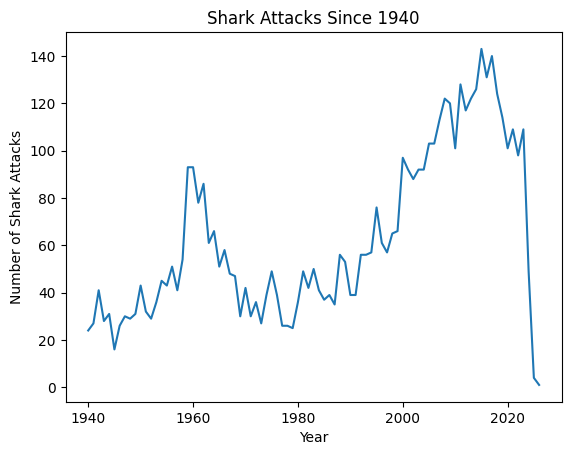

In [137]:
# Drop columns that do not contain data
shark = shark.dropna(axis = 1, how = "all")

# Describe year column
print(shark["Year"].describe())

# Filter for attacks since 1940
shark = shark[shark["Year"] >= 1940]

# Check if attacks are increasing, decreasing, or constant
yearly_counts = shark["Year"].value_counts().sort_index()
yearly_counts

# Plot attacks over time
plt.plot(yearly_counts.index, yearly_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attacks Since 1940")
plt.show()

From this plot, we see an overall increase in shark attacks from 1940 to the early 2000s. There are some fluctuations, but the overall trend shows an increase.

We also see a peak in shark attacks around the 2010s and a steep decline in attacks after 2020 (could be due to COVID-19 restrictions causing people to stay home).

In [138]:
print(shark["Age"].unique())

[23 40 28 69 48 '60+' '?' 57 24 45 61 27 38 16 33 30 15 41 14 26
 'Middle age' 18 21 49 25 46 19 20 65 64 '13' nan '11' '46' '32' '29' '10'
 '64' '62' '39' '22' '15' '16' '21' '66' '52' '20' '44' '26' '47' '55'
 '30' '59' '8' '50' '45' '34' '38' '30s' '37' '9' '19' '20/30' '35' '65'
 '20s' '77' '60' '49' '42' '!2' '24' '73' '25' '18' '50s' '58' '67' '17'
 '14' '6' '41' '53' '68' '43' '40' '51' '31' 39 58 51 17 10 13 60 '40s' 68
 35 62 'teen' 8 22 32 56 'Teen' 12 42 36 37 50 'M' 9 11 34 '!6' 31 '!!' 47
 55 7 71 59 53 54 75 '45 and 15' 73 52 29 70 4 63 44 '28 & 22'
 '22, 57, 31' '60s' "20's" 43 67 74 '9 & 60' 'a minor' 6 3 82 66 72 '23'
 '12' '36' '63' '71' '48' '70' '18 months' '57' '7' '28' '33' '61' '74'
 '27' '3' '56' '28 & 26' '5' '54' '86' '18 or 20' '12 or 13' '46 & 34'
 '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84 '\xa0 ' ' ' '30 or 36'
 '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5 ' 30' '7      &    31'
 ' 28' '20?' "60's" '69' '32 & 30' '16 to 18' '87' 'Elderly' 'mid-20s'


In [139]:
# Clean the Age variable

# Replacing values with np.nan if it it not an integer
shark.loc[~shark["Age"].astype(str).str.isdigit(), "Age"] = np.nan

# Convert Age column to numeric
shark["Age"] = pd.to_numeric(shark["Age"], errors="coerce")

# Print unique cleaned values
print(shark["Age"].unique())

[23. 40. 28. 69. 48. nan 57. 24. 45. 61. 27. 38. 16. 33. 30. 15. 41. 14.
 26. 18. 21. 49. 25. 46. 19. 20. 65. 64. 13. 11. 32. 29. 10. 62. 39. 22.
 66. 52. 44. 47. 55. 59.  8. 50. 34. 37.  9. 35. 77. 60. 42. 73. 58. 67.
 17.  6. 53. 68. 43. 51. 31. 56. 12. 36.  7. 71. 54. 75. 70.  4. 63. 74.
  3. 82. 72.  5. 86. 84. 87.  1. 81. 78.]


<function matplotlib.pyplot.show(close=None, block=None)>

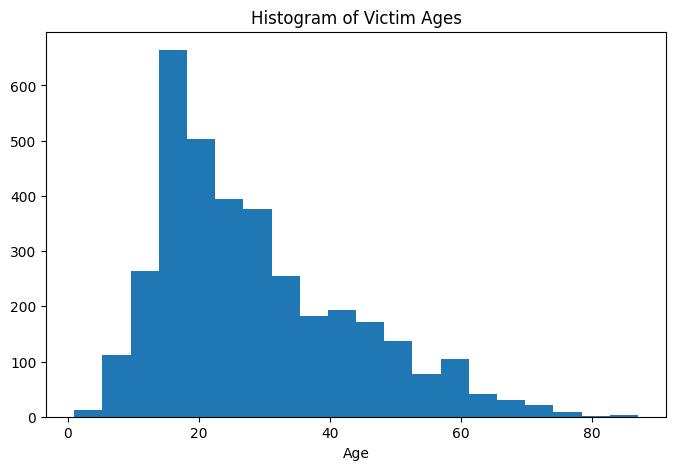

In [140]:
# Make a histogtam of the ages of the victims

# Drop NaN values for plotting
cleaned_ages = shark["Age"].dropna()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(cleaned_ages, bins = 20)
plt.xlabel("Age")
plt.title("Histogram of Victim Ages")
plt.show

In [178]:
shark["Sex"].unique()


array(['M', 'F', nan], dtype=object)

In [177]:
# What proportion of victims are male?

# Clean sex column
shark.loc[shark["Sex"] == " M", "Sex"] = "M"
shark.loc[shark["Sex"] == "M ", "Sex"] = "M"
shark.loc[shark["Sex"] == "M x 2", "Sex"] = "M"
shark.loc[shark["Sex"] == "lli", "Sex"] = np.nan

# Count male victims
male_count = shark[shark["Sex"] == "M"].shape[0]

# Count total victims (excluding NaN)
total_count = shark["Sex"].dropna().shape[0]

# Calculate proportion of male victims
male_proportion = male_count / total_count
male_proportion

0.8588846691984809

In [160]:
shark["Type"].unique()

array(['Provoked', 'Unprovoked', 'Unknown'], dtype=object)

In [157]:
# Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown.
shark["Type"] = shark["Type"].astype(str).str.strip().str.capitalize() # Make everything a string, no extra spaces, and capitalize

# Change everything else to "Unknown"
shark.loc[shark["Type"] == "Questionable", "Type"] = "Unknown"
shark.loc[shark["Type"] == "Watercraft", "Type"] = "Unknown"
shark.loc[shark["Type"] == "Sea disaster", "Type"] = "Unknown"
shark.loc[shark["Type"] == "Nan", "Type"] = "Unknown"
shark.loc[shark["Type"] == "Unconfirmed", "Type"] = "Unknown"
shark.loc[shark["Type"] == "Unverified", "Type"] = "Unknown"
shark.loc[shark["Type"] == "Invalid", "Type"] = "Unknown"
shark.loc[shark["Type"] == "Under investigation", "Type"] = "Unknown"
shark.loc[shark["Type"] == "Boat", "Type"] = "Unknown"
shark.loc[shark["Type"] == "?", "Type"] = "Unknown"

# Convert everything to a string
shark["Type"] = shark["Type"].astype(str)

array(['Provoked', 'Unprovoked', 'Unknown'], dtype=object)

In [159]:
# What proportion of attacks are unprovoked?
unprovoked_proportion = (shark["Type"] == "Unprovoked").mean()
unprovoked_proportion

0.7428519061583577

In [162]:
shark["Fatal Y/N"].unique()

array(['N', 'Y', 'F', 'M', nan, 'n', 'Nq', 'UNKNOWN', 2017, 'Y x 2', ' N'],
      dtype=object)

In [170]:
# Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
shark.loc[shark["Fatal Y/N"] == "F", "Fatal Y/N"] = "Y"
shark.loc[shark["Fatal Y/N"] == "M", "Fatal Y/N"] = "Unknown"
shark.loc[shark["Fatal Y/N"] == "n", "Fatal Y/N"] = "N"
shark.loc[shark["Fatal Y/N"] == "UNKNOWN", "Fatal Y/N"] = "Unknown"
shark.loc[shark["Fatal Y/N"] == "Y x 2", "Fatal Y/N"] = "Y"
shark.loc[shark["Fatal Y/N"] == " N", "Fatal Y/N"] = "N"
shark.loc[shark["Fatal Y/N"] == 2017, "Fatal Y/N"] = "Unknown"
shark.loc[shark["Fatal Y/N"] == "Nq", "Fatal Y/N"] = "Unknown"
shark["Fatal Y/N"] = shark["Fatal Y/N"].fillna("Unknown")

# Check for unique values again
shark["Fatal Y/N"].unique()

array(['N', 'Y', 'Unknown'], dtype=object)

In [188]:
# Are sharks more likely to launch unprovoked attacks on men or women?
m_or_f = shark[shark["Sex"].isin(["M", "F"])]

unprovoked_counts = m_or_f[m_or_f["Type"] == "Unprovoked"]["Sex"].value_counts(normalize = True)
print(unprovoked_counts)

# Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
fatal_by_type = shark[shark["Fatal Y/N"] == "Y"]["Type"].value_counts(normalize=True)
print(fatal_by_type)

# Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
fatal_by_sex = m_or_f[m_or_f["Fatal Y/N"] == "Y"]["Sex"].value_counts(normalize = True)
print(fatal_by_sex)

Sex
M    0.846587
F    0.153413
Name: proportion, dtype: float64
Type
Unprovoked    0.834559
Unknown       0.149510
Provoked      0.015931
Name: proportion, dtype: float64
Sex
M    0.882432
F    0.117568
Name: proportion, dtype: float64


In [207]:
# What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

shark["White Shark"] = shark["Species"].str.contains("white", na = False)
white_shark_proportion = shark["White Shark"].mean()
white_shark_proportion

0.12884897360703812

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

This paper is about the importance of data tyding, a crucial step in the data cleaning process. Tidy data follows a specific structure, each variable is a column, and each observation is a row, and each observational unit os a table. Overall, this paper emphasizes the importance of this structure in making data analysis easier, more efficient, and consistent.


  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

The "tidy data standard" is intended to make the data cleaning and analysis process easier. It provides a standard for how all datasets should be structured and organized, simplifying initial cleaning, as well as how data analysis tools should be created. If all data analysis tools are created to work with a standard structure, these tools can work together seamlessly, without the need to restructure the data for each step.


  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

"Like families, tidy datasets are all alike but every messy dataset is messy in its own way" means that tidy datasets follow a simple, standard structure, that are all similar to each other, but messy datasets come in all sorts of problematic forms, requiring different methods to make them tidy.

"For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general" means when you're looking at a specific, organized dataset, it feels very easy to separate observations from variables (rows and columns), however, it can get complicated when trying to define variables and observations in general (not in a dataset). This is because a variable (column) in one dataset could be an observation (row) in another, it is not always straightforward.

  4. Read Section 2.2. How does Wickham define values, variables, and observations?

Wickham defines a value as a single piece of data, each one associated to a variable and an observation.

Wickham defines a variable as containing all values that measure the same attribute (such as height or temperature).

Wickham defines an obervation as contained all values measured on the same unit (such as one person or a specific time point).

  5. How is "Tidy Data" defined in section 2.3?

In section 2.3, "Tidy Data" is defined as following three rules:
> 1. Each variable forms a column.
> 2. Each observation forms a row.
> 3. Each type of observational unit forms a table.
This standard structure simplifies the data analysis process by making it easier to extract variables and apply certain tools, such as programming languages like R.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

5 most common problems with messy datasets:
> 1. Column headers are values, not variable names.
> 2. Multiple variables are stored in one column.
> 3. Variables are stored in both rows and columns.
> 4. Multiple types of observational units are stored in the same table.
> 5. A single observational unit is stored in multiple tables.

The data in Table 4 are messy because the column headers contain values instead of variable names (values of the "income" variable). This means one variable is spread across multiple columns, violating the tidy data structure.

"Melting" a dataset is the process of turning column names into values of a new variable and creating a second column to store the corresponding values.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

Table 11 is messy because:
- Column headers contained values instead of variables (d1, d2, etc. are days of the month).
- The "element" column contains variable names (tmin and tmax). This means a variable is stored in both rows and columns.

Table 12 is tidy and "molten" because:
- It follows the 3 rules of tidy data (each variable has its own column, each observation has its own row)
- There is a date column contining the actual date values instead of d1, d2, etc.
- "Melting" the data fixes the structure (reshapes wide data into long data).
- The "element" column stores tmin and tmax, ensuring that each row contains one measurement per date.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  The "chicken-and-egg" problem refers to the interdependence between tidy data and tidy tools. This means that tidy data is only useful if we have tools that can work with it efficiently, and developing better tools depends on having access to tidy data. However, this creates a problem when messy data leads to messy tools, reinforcing the use of messy data.

  In the future, Wickham hopes there is a bigger focus on the tidy data framework to create better tools and more effective data storage solutions. Wickham also hopes future work will include user-testing, ethnography, and human-centered design to build better, more intuitive data tools.



**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?